In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = r'C:\Users\Lenovo\Documents\KULIAH\semester 6\Analisis Sinyal Biomedis\all feature & labelling.csv'
df = pd.read_csv(file_path, header=None, sep =";")
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,:3].copy()
y = df.iloc[:,3].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(24297, 3)
(24297,)


In [6]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [10]:
#LSTM
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
reshaped_inputs = tf.expand_dims(inputs, axis=-1)  # Add an extra dimension for time steps

# LSTM layers
x = tf.keras.layers.LSTM(64, return_sequences=True)(reshaped_inputs)
# Rest of the LSTM layers...

x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)

# Dense layers
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_lstm = tf.keras.Model(inputs, outputs)
model_lstm.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 3, 1)             0         
 a)                                                              
                                                                 
 lstm_10 (LSTM)              (None, 3, 64)             16896     
                                                                 
 lstm_11 (LSTM)              (None, 3, 64)             33024     
                                                                 
 lstm_12 (LSTM)              (None, 3, 64)             33024     
                                                                 
 lstm_13 (LSTM)              (None, 3, 64)             33024     
                                                           

In [11]:
model_lstm.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
batch_size = 32
epochs = 100

history = model_lstm.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
456/456 [==============================] - 42s 34ms/step - loss: 0.8455 - accuracy: 0.5446 - val_loss: 0.6567 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 2/100
456/456 [==============================] - 12s 27ms/step - loss: 0.5591 - accuracy: 0.7466 - val_loss: 0.5333 - val_accuracy: 0.7501 - lr: 0.0010
Epoch 3/100
456/456 [==============================] - 14s 32ms/step - loss: 0.5391 - accuracy: 0.7530 - val_loss: 0.5350 - val_accuracy: 0.7525 - lr: 0.0010
Epoch 4/100
456/456 [==============================] - 12s 27ms/step - loss: 0.5270 - accuracy: 0.7575 - val_loss: 0.5536 - val_accuracy: 0.7564 - lr: 0.0010
Epoch 5/100
456/456 [==============================] - 10s 22ms/step - loss: 0.5138 - accuracy: 0.7685 - val_loss: 0.5016 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 6/100
456/456 [==============================] - 10s 23ms/step - loss: 0.5097 - accuracy: 0.7670 - val_loss: 0.5171 - val_accuracy: 0.7547 - lr: 0.0010
Epoch 7/100
456/456 [==============================]

190/190 [==============================] - 7s 8ms/step


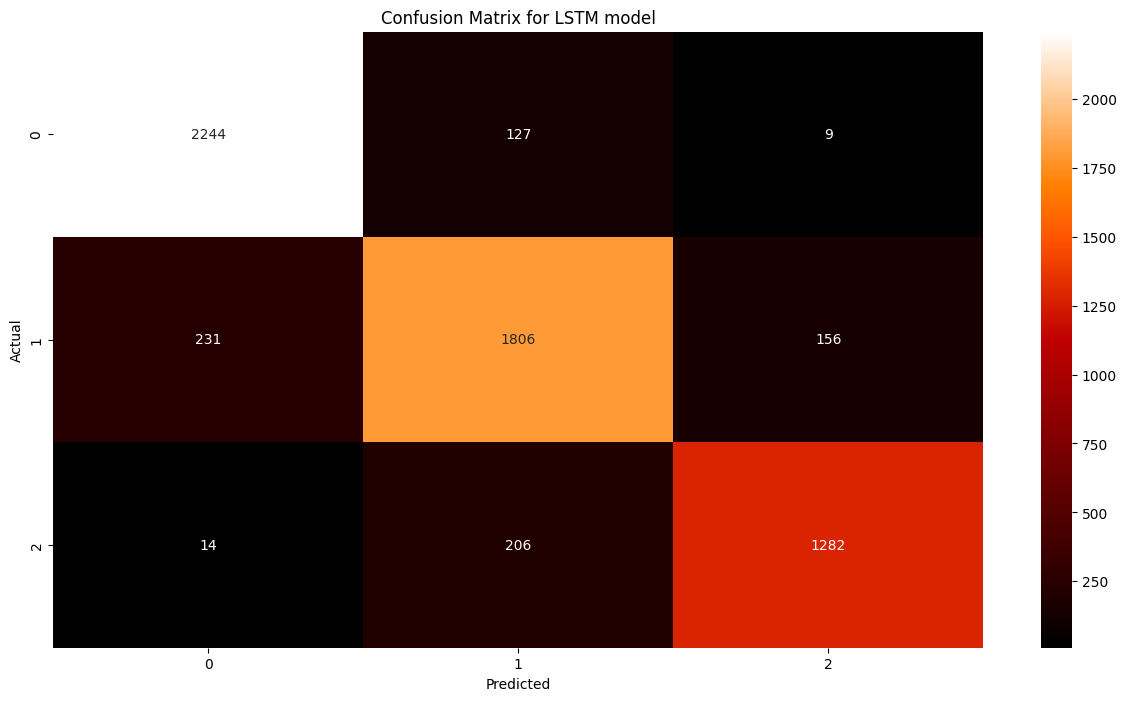

In [13]:
# Confusion matrix for LSTM model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_true = np.array(y_test)
y_pred_lstm = np.argmax(model_lstm.predict(x_test), axis=-1)
cm_lstm = confusion_matrix(y_true, y_pred_lstm)
plt.figure(figsize = (15,8))
sns.heatmap(cm_lstm, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LSTM model")
plt.show()